In [79]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
data = pd.read_csv('medical_clean.csv')

# Handle missing values
data = data.dropna()

In [81]:
# Examining fist five records of dataset
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [82]:
# Viewing DataFrame descriptive information
data.info

<bound method DataFrame.info of       CaseOrder Customer_id                           Interaction  \
0             1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1             2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2             3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3             4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4             5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...         ...         ...                                   ...   
9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                   UID          City State        County  \
0     3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL     

In [83]:
# Getting an overview of descriptive stats
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [84]:
# Getting data types of features
data.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [85]:
# Checking for null values
data.isnull()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
# Renaming the last 8 Survey Columns for better description of variables
data.rename(columns = {'Item1' : 'TimelyResponse',
                           'Item2' : 'Fixes' ,
                           'Item3' : 'Replacements' ,
                           'Item4' : 'Reliability' ,
                           'Item5' : 'Options' ,
                           'Item6' : 'Respectfulness' ,
                           'Item7' : 'Courteous' ,
                           'Item8' : 'Listening'},
                          inplace=True)

In [87]:
# Converting ordinal categorical data into numeric variables
data['Area_num'] = data.Area.map({'Rural' : 0, 'Urban' : 1, 'Suburban' : 2})
data['Marital_num'] =data.Marital.map({'Never Married' : 0, 'Married' : 1, 'Separated' : 2, 'Divorced' : 3, 'Widowed' : 4})
data['Gender_num'] = data.Gender.map({'Nonbinary' : 0, 'Male' : 1, 'Female' : 2})
data['Initial_admin_num'] = data.Initial_admin.map({'Elective Admission' : 0, 'Observation Admission' : 1, 'Emergency Admission' : 2})
data['Complication_risk_num'] = data.Complication_risk.map({'Low' : 0, 'Medium' : 1, 'High' : 2})
data['Services_num'] = data.Services.map({'Blood Work' : 0, 'Intravenous' : 1, 'CT Scan' : 2, 'MRI' : 3})

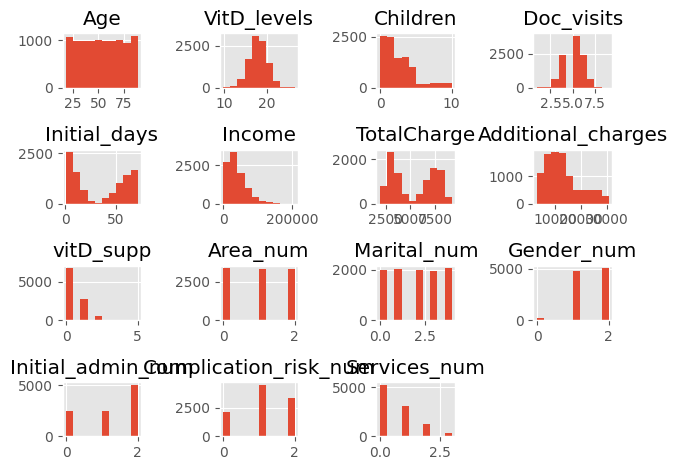

In [88]:
# Histograms of continuous variables
data[['Age', 'VitD_levels', 'Children',  'Doc_visits', 'Initial_days', 'Income', 'TotalCharge',
          'Additional_charges', 'vitD_supp', 'Area_num','Marital_num','Gender_num','Initial_admin_num', 'Complication_risk_num', 'Services_num']].hist()
plt.savefig('med_pyplott2.jpg')
plt.tight_layout()

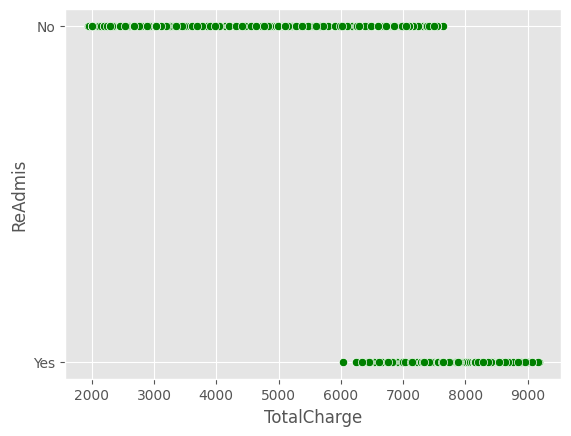

In [89]:
# A scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=data['TotalCharge'], y=data['ReAdmis'], color='green')
plt.show()

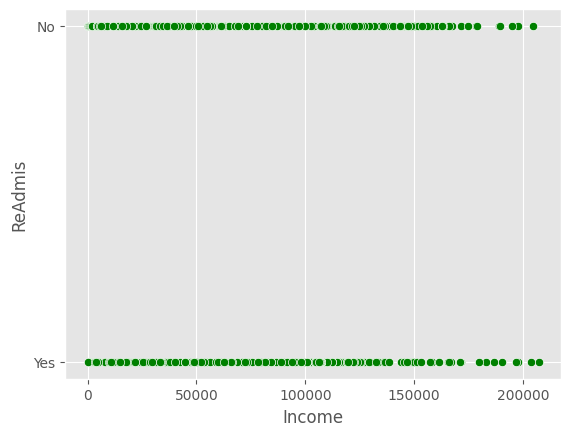

In [90]:
# A scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=data['Income'], y=data['ReAdmis'], color='green')
plt.show()

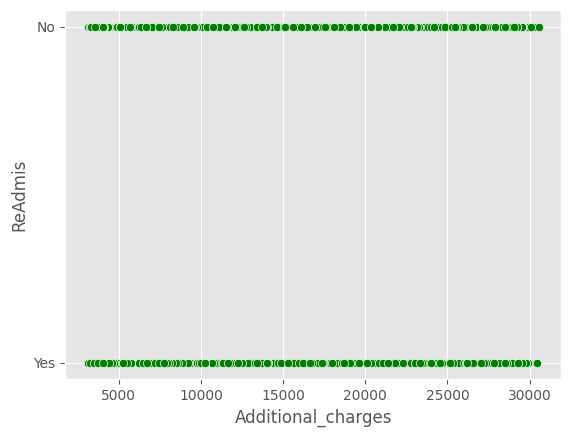

In [91]:
# A scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=data['Additional_charges'], y=data['ReAdmis'], color='green')
plt.show()

In [92]:
# I will now set the plot style to ggplot
plt.style.use('ggplot')

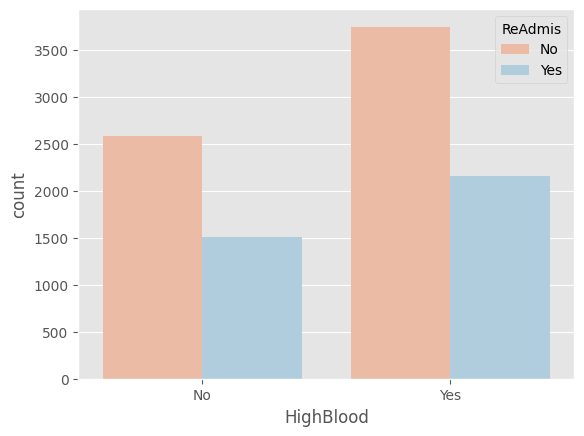

In [93]:
# Countplots of categorical variables
plt.figure()
sns.countplot(x='HighBlood', hue='ReAdmis', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

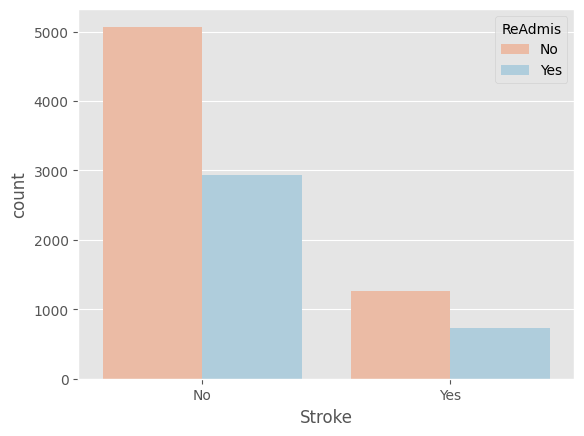

In [94]:
plt.figure()
sns.countplot(x='Stroke', hue='ReAdmis', data=data, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

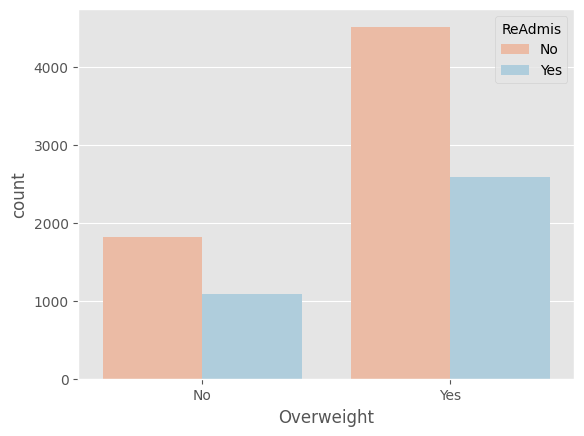

In [95]:
plt.figure()
sns.countplot(x='Overweight', hue='ReAdmis', data=data, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

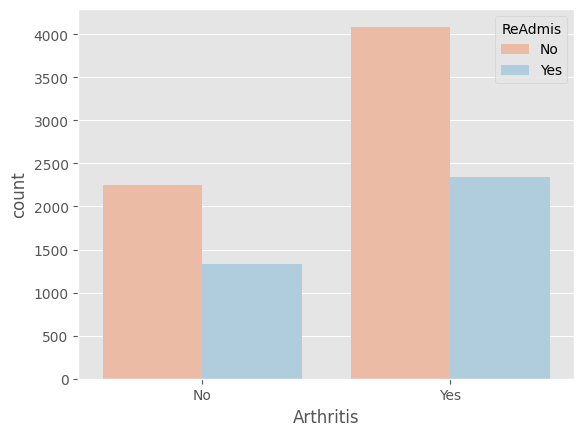

In [96]:
plt.figure()
sns.countplot(x='Arthritis', hue='ReAdmis', data=data, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

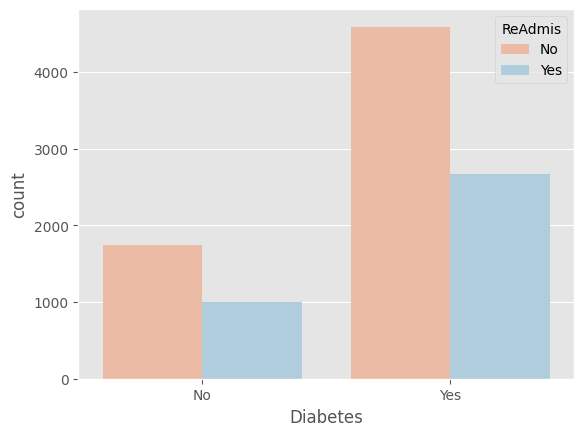

In [97]:
plt.figure()
sns.countplot(x='Diabetes', hue='ReAdmis', data=data, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

array([[<Axes: xlabel='TimelyResponse', ylabel='TimelyResponse'>,
        <Axes: xlabel='Fixes', ylabel='TimelyResponse'>,
        <Axes: xlabel='Replacements', ylabel='TimelyResponse'>,
        <Axes: xlabel='Reliability', ylabel='TimelyResponse'>,
        <Axes: xlabel='Options', ylabel='TimelyResponse'>,
        <Axes: xlabel='Respectfulness', ylabel='TimelyResponse'>,
        <Axes: xlabel='Courteous', ylabel='TimelyResponse'>,
        <Axes: xlabel='Listening', ylabel='TimelyResponse'>],
       [<Axes: xlabel='TimelyResponse', ylabel='Fixes'>,
        <Axes: xlabel='Fixes', ylabel='Fixes'>,
        <Axes: xlabel='Replacements', ylabel='Fixes'>,
        <Axes: xlabel='Reliability', ylabel='Fixes'>,
        <Axes: xlabel='Options', ylabel='Fixes'>,
        <Axes: xlabel='Respectfulness', ylabel='Fixes'>,
        <Axes: xlabel='Courteous', ylabel='Fixes'>,
        <Axes: xlabel='Listening', ylabel='Fixes'>],
       [<Axes: xlabel='TimelyResponse', ylabel='Replacements'>,
        <Axe

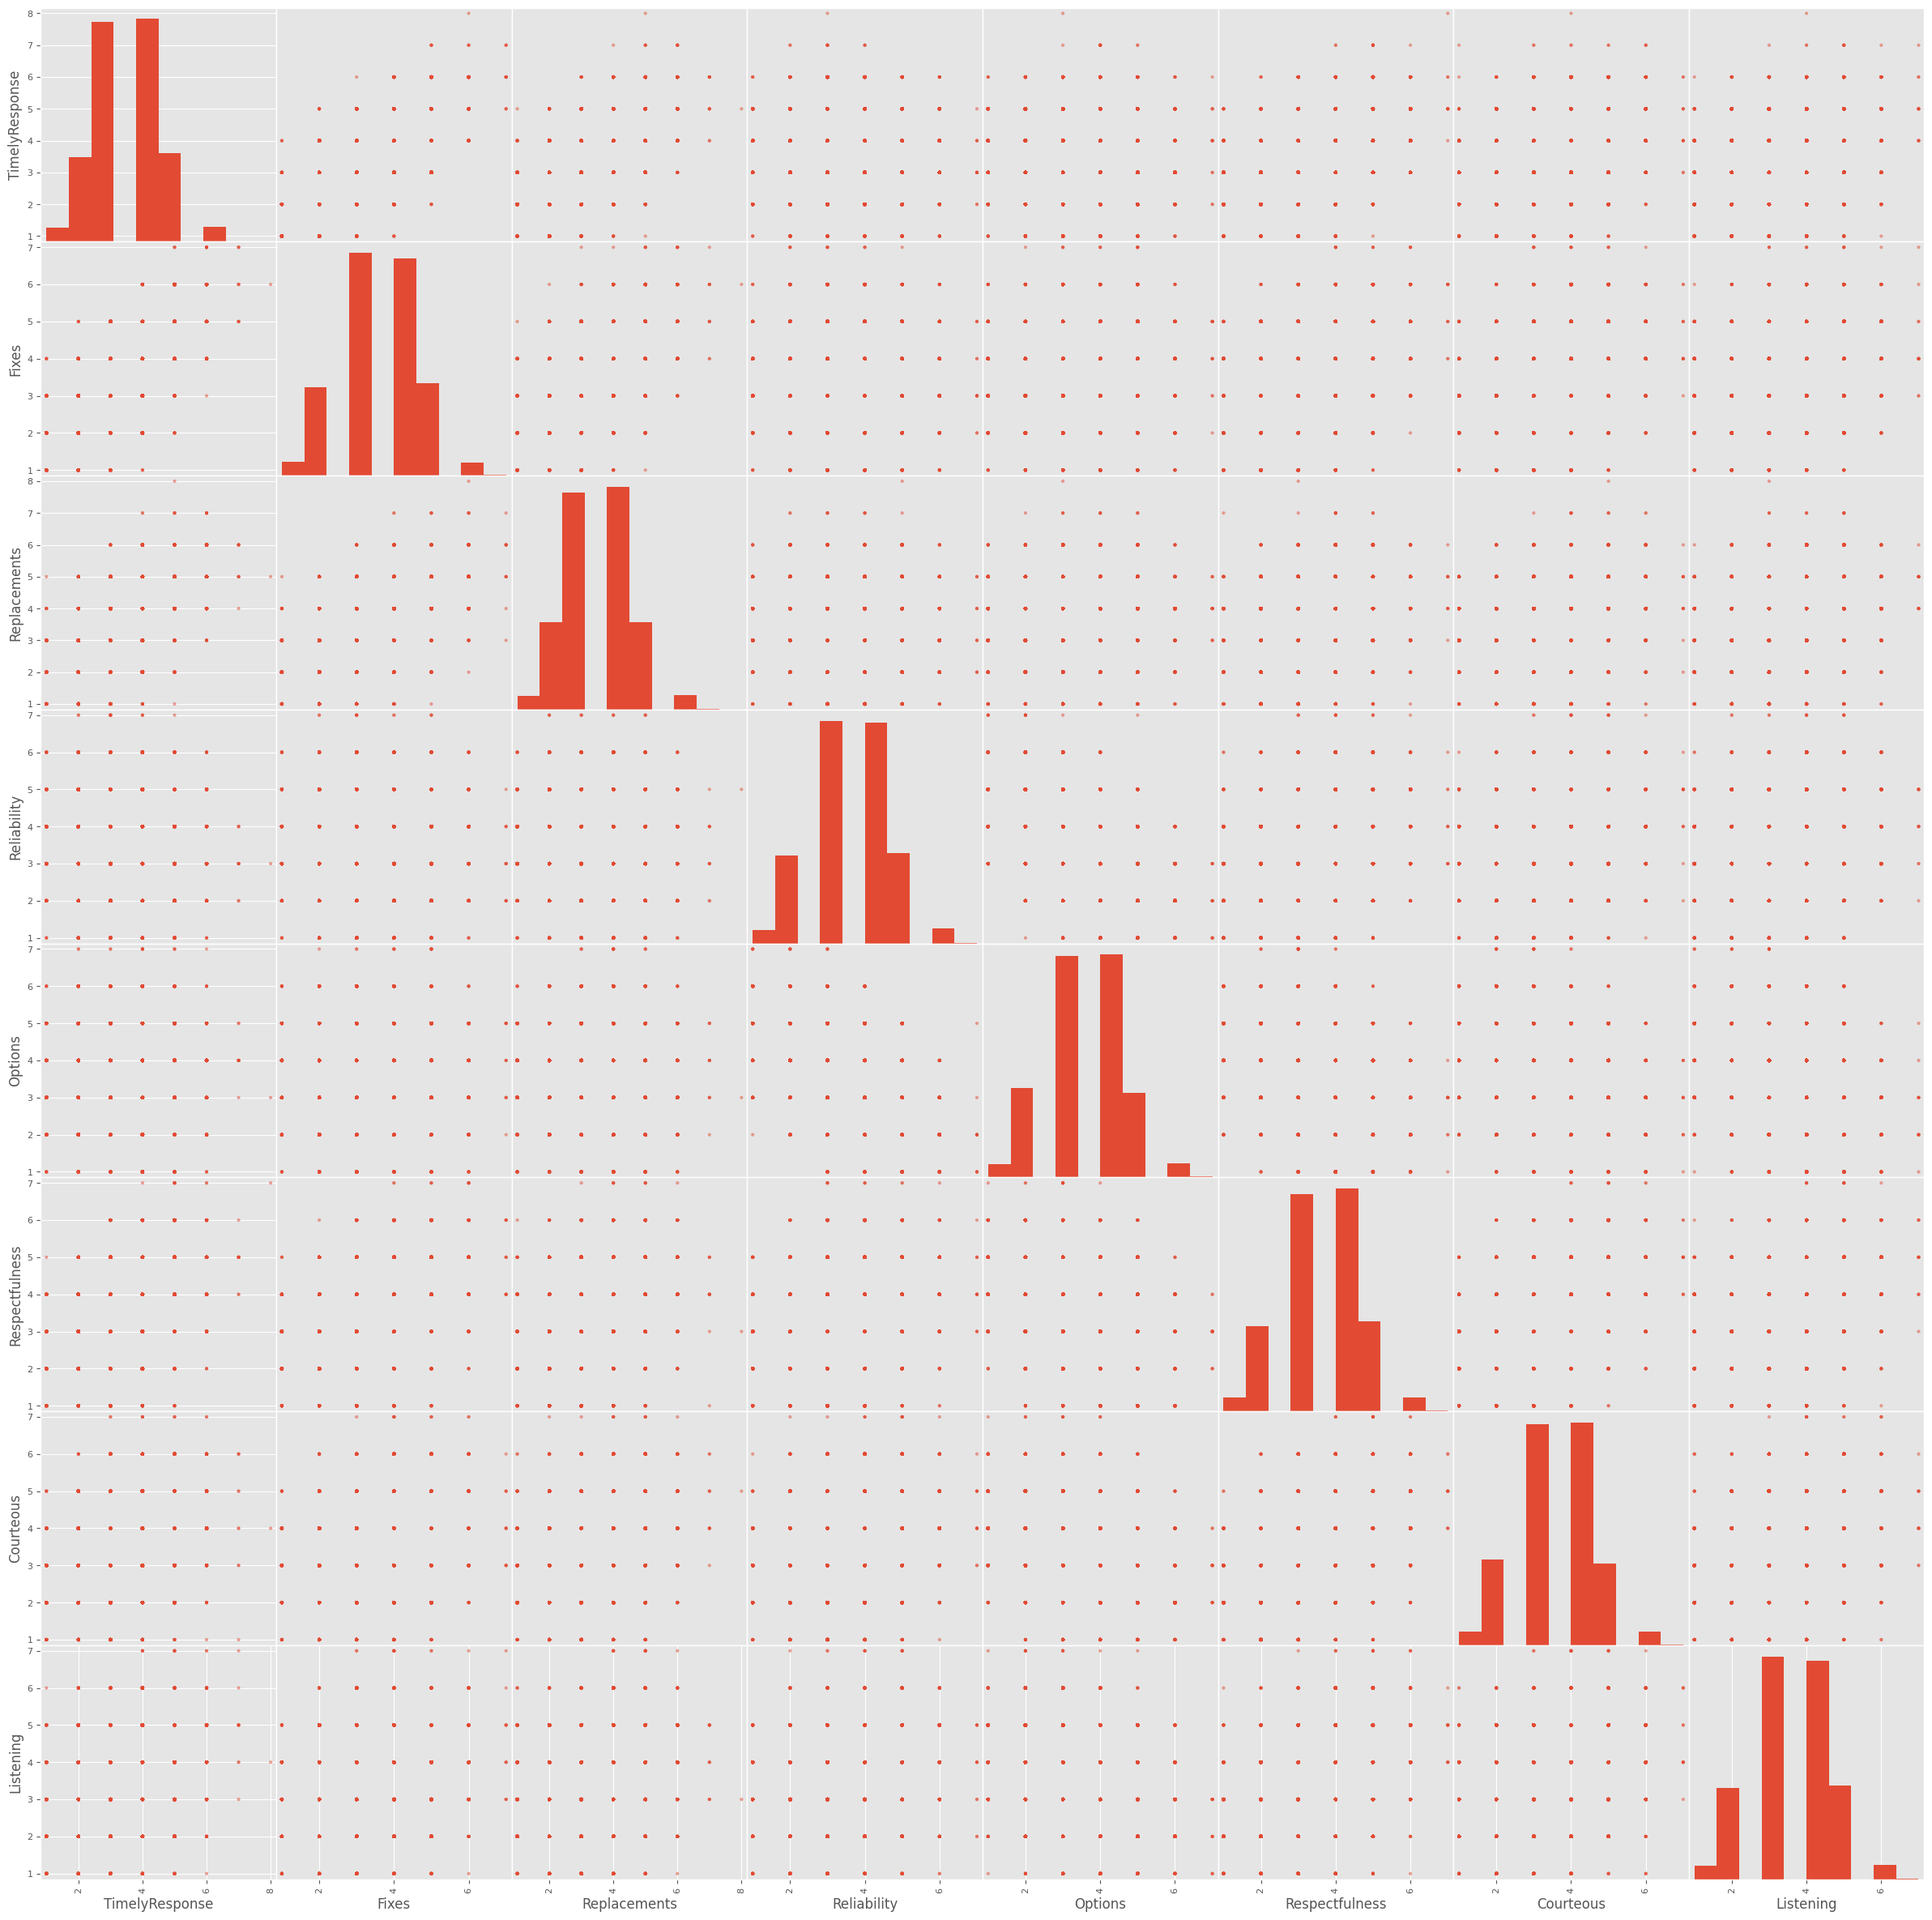

In [98]:
# A scatter matrix of the discrete variables for high level overview of potential relationships & distributions
med_discrete = data[['ReAdmis','TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options', 
                           'Respectfulness', 'Courteous', 'Listening']]
pd.plotting.scatter_matrix(med_discrete, figsize = [30, 30])

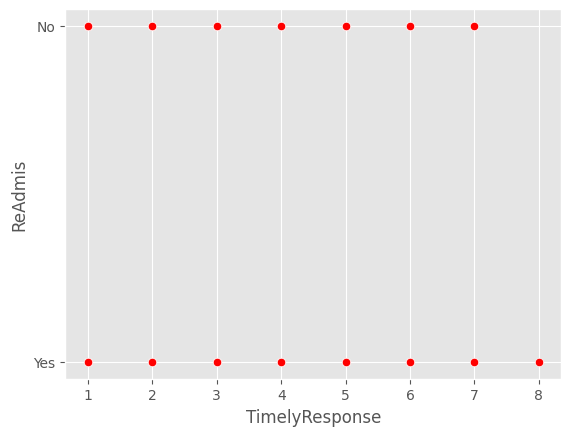

In [99]:
# An individual scatterplot for viewing relationship of key financial feature against target variable
sns.scatterplot(x = data['TimelyResponse'], y = data['ReAdmis'], color='red')
plt.show()

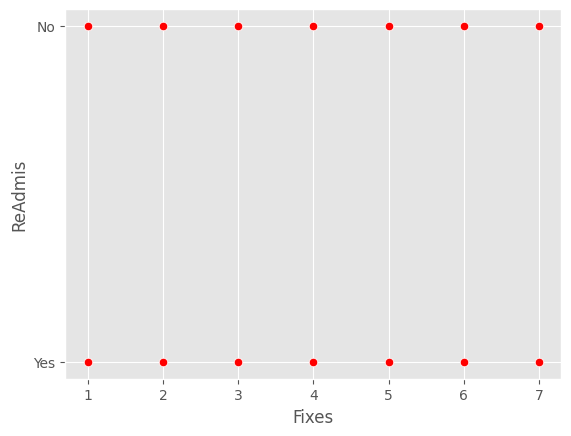

In [100]:
sns.scatterplot(x = data['Fixes'], y = data['ReAdmis'], color='red')
plt.show()

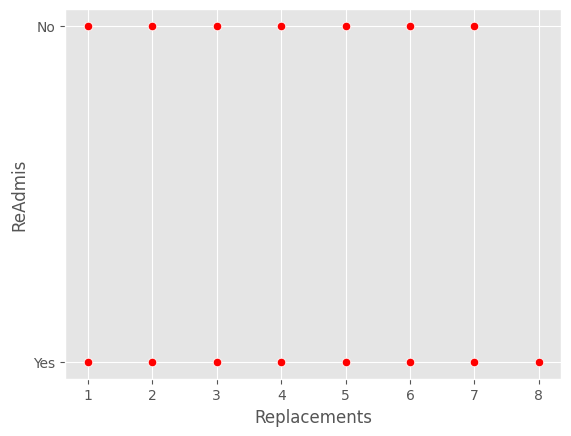

In [101]:
sns.scatterplot(x = data['Replacements'], y = data['ReAdmis'], color='red')
plt.show()

In [102]:
# Converting binary categorical variables to numeric variables
data['ReAdmis_num'] = [1 if v == 'Yes' else 0 for v in data['ReAdmis']]
data['Soft_drink_num'] = [1 if v == 'Yes' else 0 for v in data['Soft_drink']]
data['HighBlood_num'] = [1 if v == 'Yes' else 0 for v in data['HighBlood']]
data['Stroke_num'] = [1 if v == 'Yes' else 0 for v in data['Stroke']]
data['Overweight_num'] = [1 if v == 'Yes' else 0 for v in data['Overweight']]
data['Arthritis_num'] = [1 if v == 'Yes' else 0 for v in data['Arthritis']]
data['Diabetes_num'] = [1 if v == 'Yes' else 0 for v in data['Diabetes']]
data['Hyperlipidemia_num'] = [1 if v == 'Yes' else 0 for v in data['Hyperlipidemia']]
data['BackPain_num'] = [1 if v == 'Yes' else 0 for v in data['BackPain']]
data['Anxiety_num'] = [1 if v == 'Yes' else 0 for v in data['Anxiety']]
data['Allergic_rhinitis_num'] = [1 if v == 'Yes' else 0 for v in data['Allergic_rhinitis']]
data['Reflux_esophagitis_num'] = [1 if v == 'Yes' else 0 for v in data['Reflux_esophagitis']]
data['Asthma_num'] = [1 if v == 'Yes' else 0 for v in data['Asthma']]

In [103]:
#Drop original categorical features from dataframe for further analysis
data = data.drop(columns=['ReAdmis', 'Area', 'Marital', 'Gender', 'Initial_admin', 
                                  'Complication_risk' , 'Services', 'Soft_drink', 'HighBlood', 
                                  'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
                                  'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'])

In [104]:
#Remove the other less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
data = data.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job'])

In [105]:
# Save the cleaned data
data.to_csv('medical_clean_prepared_D209_T2.csv', index=False)

In [106]:
from sklearn.model_selection import train_test_split

# Define target and features
X = data.drop('ReAdmis_num', axis=1)
y = data['ReAdmis_num']

In [107]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the training and testing data
X_train.to_csv('D209_T2_X_train.csv', index=False)
X_test.to_csv('D209_T2_X_test.csv', index=False)
y_train.to_csv('D209_T2_y_train.csv', index=False)
y_test.to_csv('D209_T2_y_test.csv', index=False)

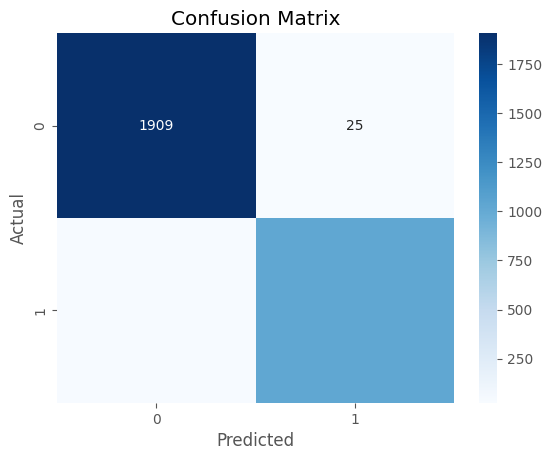

Accuracy: 0.98
Mean Squared Error: 0.02


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate accuracy and MSE
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print results
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')